In [1]:
import pandas as pd
import numpy as np
from global_variables.global_variables import filename_proc, sleep_activities, start_date, data_name
from supporting_func.data_summaries import strip_activity, combine_sleep, split_data, convert_to_hours
from datetime import datetime, timedelta

In [2]:
#download just the sleep data
df = pd.read_csv(filename_proc)
df = df[sleep_activities]
time_frame = 30
data_dict = split_data(df,time_frame)
df_train = data_dict[0]
df_test = data_dict[1]

In [3]:
#create pd start sleep, stop sleep, time slept, date
sleep_summary_train = strip_activity('Sleep', df_train)

In [4]:
end_date_train = start_date + timedelta(days=time_frame)
daily_sleep_sum_train = combine_sleep(sleep_summary_train,start_date, end_date_train)
print(daily_sleep_sum_train)

                  Date  total_sleep first_sleep last_sleep  sleep_count
0  2012-07-20 12:00:00         0.00                                   0
1  2012-07-21 12:00:00         6.43    00:00:00   06:32:00            2
2  2012-07-22 12:00:00         7.10    00:11:00   08:03:00            3
3  2012-07-23 12:00:00         6.87    23:59:00   06:57:00            2
4  2012-07-24 12:00:00         6.25    00:44:00   06:59:00            1
5  2012-07-25 12:00:00         7.42    23:59:00   07:24:00            1
6  2012-07-26 12:00:00         7.00    00:25:00   07:25:00            1
7  2012-07-27 12:00:00         5.40    00:33:00   05:57:00            1
8  2012-07-28 12:00:00         5.75    00:59:00   06:44:00            1
9  2012-07-29 12:00:00         7.83    23:48:00   07:45:00            2
10 2012-07-30 12:00:00         6.82    01:48:00   08:37:00            1
11 2012-07-31 12:00:00         5.45    01:14:00   06:41:00            1
12 2012-08-01 12:00:00         6.42    01:13:00   07:38:00      

In [5]:
#Find average bed time and wake-up times

#converts first sleep times to floats
first_sleep_list = daily_sleep_sum_train['first_sleep'].to_numpy()
first_sleep_times = convert_to_hours(first_sleep_list)
average_first_sleep = np.nanmean(first_sleep_times)
print(average_first_sleep)

#convert end sleep times to floats
end_sleep_list = daily_sleep_sum_train['last_sleep'].to_numpy()
end_sleep_times = convert_to_hours(end_sleep_list, night_time=False)
average_end_sleep = np.nanmean(end_sleep_times)
print(average_end_sleep)



24.748765432098768
7.411728395061728


In [6]:
#find the distributions for time slept, average bed time, average wake time
average_sleep = daily_sleep_sum_train['total_sleep'][:-2].mean()
std_sleep = daily_sleep_sum_train['total_sleep'].std()
std_sleep = std_sleep -0.1
print(average_sleep)
print(std_sleep)

6.377142857142857
2.0928746681798365


In [7]:
sleep_summary_test = strip_activity('Sleep', df_test)
start_date_test = end_date_train
end_date_test = datetime.strptime(df['Date'][df_test.index.tolist()[-1]], '%Y-%m-%d %H:%M:%S')

In [9]:
daily_sleep_sum_test = combine_sleep(sleep_summary_test,start_date_test, end_date_test)
print(daily_sleep_sum_test)

                  Date  total_sleep first_sleep last_sleep  sleep_count
0  2012-08-19 12:00:00         5.73    00:54:00   06:38:00            1
1  2012-08-20 12:00:00         6.88    00:11:00   07:11:00            2
2  2012-08-21 12:00:00         4.20    03:26:00   07:38:00            1
3  2012-08-22 12:00:00         7.15    23:53:00   07:02:00            1
4  2012-08-23 12:00:00         3.83    23:57:00   03:47:00            1
5  2012-08-24 12:00:00         5.53    00:22:00   05:54:00            1
6  2012-08-25 12:00:00         7.80    23:47:00   07:41:00            2
7  2012-08-26 12:00:00         7.18    00:19:00   07:36:00            2
8  2012-08-27 12:00:00         6.48    00:48:00   07:22:00            2
9  2012-08-28 12:00:00        10.88    22:49:00   09:56:00            2
10 2012-08-29 12:00:00         2.82    01:50:00   04:39:00            1
11 2012-08-30 12:00:00         4.95    01:14:00   06:11:00            1
12 2012-08-31 12:00:00         9.40    00:27:00   10:13:00      

In [11]:
#create the lists for the y axis

#converts first sleep times to floats
first_sleep_list = daily_sleep_sum_test['first_sleep'].to_numpy()
first_sleep_times = convert_to_hours(first_sleep_list)

#quick fix - removes 

#convert end sleep times to floats
end_sleep_list = daily_sleep_sum_test['last_sleep'].to_numpy()
end_sleep_times = convert_to_hours(end_sleep_list, night_time=False)

#total_sleep convert
total_sleep_times = daily_sleep_sum_test['total_sleep'].to_numpy()

#create the x-axis
count = total_sleep_times.size
index_array = np.arange(1,count+1,dtype=int)

#create the average lines for total sleep
average_total_sleep_list = np.full((count,),average_sleep)
one_std_up_total_sleep_list = np.full((count,),average_sleep+std_sleep)
one_std_down_total_sleep_list = np.full((count,),average_sleep-std_sleep)

#create the average lines for begin and end sleep
average_start_sleep_list = np.full((count,),average_first_sleep)
average_end_sleep_list = np.full((count,),average_end_sleep)



In [12]:
#packages for plotting the charts

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

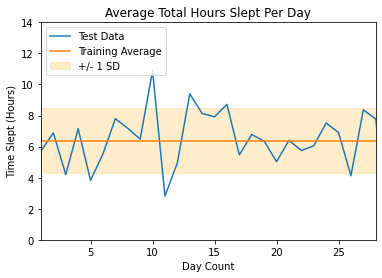

In [15]:
#PLOTTING AVERAGE SLEEP PER DAY

#plot the time slept per day
plt.plot(index_array,total_sleep_times,label="Test Data")

#plot the average from train
plt.plot(index_array,average_total_sleep_list,label="Training Average")


#fill between the two std deviations h101
plt.fill_between(index_array,one_std_down_total_sleep_list,one_std_up_total_sleep_list,color='orange',alpha=0.2)
plt.ylim([0, 14])
plt.xlim([1, count-1])

# #fill between the two std deviations h120
# plt.fill_between(index_array,one_std_down_total_sleep_list,one_std_up_total_sleep_list,color='orange',alpha=0.2)
# plt.ylim([5, 12])
# plt.xlim([1, count-1])

#add label
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()
patch = mpatches.Patch(color='orange', alpha=0.2, label='+/- 1 SD')
handles.append(patch)
plt.legend(handles=handles, loc="upper left")

plt.title('Average Total Hours Slept Per Day')
plt.xlabel('Day Count')
plt.ylabel('Time Slept (Hours)')
plt.savefig(f'report_outputs/imgs/{data_name}_averagetothours.jpg',dpi=200)
plt.show()


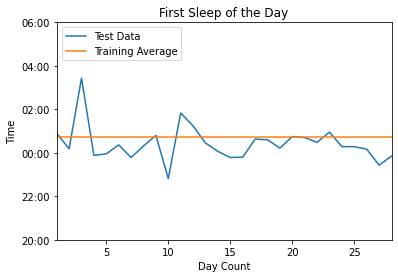

In [16]:
#PLOTTING BED TIME SLEEP PER DAY

#plot the time slept per day
plt.plot(index_array,first_sleep_times,label="Test Data")

#plot the average from train
plt.plot(index_array,average_start_sleep_list,label="Training Average")

#fill between the two std deviations (hh101)
plt.yticks(np.arange(20, 30+1, 2.0))
plt.ylim([20, 30])
plt.xlim([1, count-1])

# #fill between the two std deviations (h120)
# plt.yticks(np.arange(12, 28+1, 2.0))
# plt.ylim([12, 28])
# plt.xlim([1, count])

#add label
# labels = ["12:00","14:00","16:00","18:00","20:00","22:00","00:00","02:00","04:00"]
labels = ["20:00","22:00","00:00","02:00","04:00","06:00"]

plt.gca().set_yticklabels(labels)
plt.legend(loc="upper left")

plt.title('First Sleep of the Day')
plt.xlabel('Day Count')
plt.ylabel('Time')
plt.savefig(f'report_outputs/imgs/{data_name}_firstsleep.jpg',dpi=200)
plt.show()


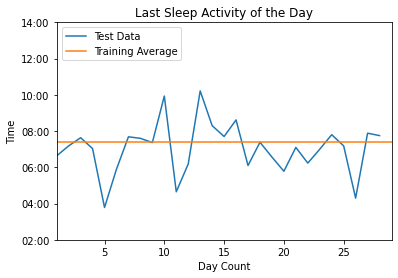

In [17]:
#PLOTTING WAKE_UP SLEEP PER DAY

#plot the time slept per day
plt.plot(index_array,end_sleep_times,label="Test Data")

#plot the average from train
plt.plot(index_array,average_end_sleep_list,label="Training Average")

# #fill between the two std deviations
# plt.yticks(np.arange(4, 16+1, 2.0))
# plt.ylim([4, 16])
# plt.xlim([1, count])

# fill between the two std deviations
plt.yticks(np.arange(2, 14+1, 2.0))
plt.ylim([2, 14])
plt.xlim([1, count])

#h101 labels
labels = ["02:00","04:00","06:00","08:00","10:00","12:00","14:00"]

plt.gca().set_yticklabels(labels)
plt.legend(loc="upper left")

plt.title('Last Sleep Activity of the Day')
plt.xlabel('Day Count')
plt.ylabel('Time')
plt.savefig(f'report_outputs/imgs/{data_name}_endsleep.jpg',dpi=200)
plt.show()